In [2]:
import seaborn as sns;
import pandas as pd;



## Task 1

In [39]:
#1 Find and download a dataset
taxiData = sns.load_dataset("taxis")
#2 Data Exploration
taxiData.describe() 

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [33]:
#2 Data Exploration
taxiData.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
#2 Data Exploration
taxiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [6]:
#3 Data cleaning
print("Uncleaned dataset:",taxiData["total"].count())
tripData = taxiData.drop(taxiData[ (taxiData['passengers'] == 0)].index)
print("Minimum of 1 passengers:",tripData["total"].count())
tripData = tripData.drop(tripData[ (tripData['distance'] == 0)].index)
tripData ["payment"] = tripData["payment"].fillna("credit card")
tripData = tripData.dropna()
print("Minimum 1 passenger and distance:",tripData["total"].count())
print("Cleaned total:", taxiData["total"].count() - tripData["total"].count())

Uncleaned dataset: 6433
Minimum of 1 passengers: 6337
Minimum 1 passenger and distance: 6252
Cleaned total: 181


In [7]:
#3 Data Cleaning - Outliers
tripData.sort_values('distance', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.0,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
2397,2019-03-21 18:56:59,2019-03-21 19:49:58,1,30.23,52.0,13.11,5.76,78.67,yellow,credit card,JFK Airport,Meatpacking/West Village West,Queens,Manhattan
1535,2019-03-09 18:57:53,2019-03-09 19:49:53,1,28.30,52.0,2.00,5.76,63.06,yellow,credit card,World Trade Center,JFK Airport,Manhattan,Queens
3875,2019-03-30 17:07:48,2019-03-30 18:10:46,6,28.15,52.0,12.46,9.50,74.76,yellow,credit card,Financial District North,JFK Airport,Manhattan,Queens
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.5,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


In [8]:
#3 Data Cleaning - outliers

tripData.sort_values('fare', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
5364,2019-03-17 16:59:17,2019-03-17 18:04:08,2,36.70,150.00,0.00,24.02,174.82,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
5567,2019-03-07 00:28:57,2019-03-07 02:02:55,1,25.51,93.50,0.00,0.00,94.80,green,credit card,Sunset Park West,Saint Albans,Brooklyn,Queens
5827,2019-03-05 10:34:36,2019-03-05 11:44:01,1,20.64,86.14,0.00,5.76,92.40,green,credit card,Coney Island,Upper East Side North,Brooklyn,Manhattan
6053,2019-03-05 07:23:49,2019-03-05 09:11:29,1,22.17,81.86,0.00,0.00,82.36,green,credit card,University Heights/Morris Heights,Yorkville East,Bronx,Manhattan
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn


In [9]:
#3 Data Cleaning - outliers
tripData.sort_values('tip', ascending=False).head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4218,2019-03-29 17:32:20,2019-03-29 18:53:52,1,26.92,75.50,23.19,0.00,100.49,yellow,credit card,JFK Airport,Cobble Hill,Queens,Brooklyn
2387,2019-03-28 15:58:52,2019-03-28 15:59:25,1,1.80,69.06,20.80,0.00,90.16,yellow,credit card,JFK Airport,JFK Airport,Queens,Queens
785,2019-03-15 15:10:03,2019-03-15 16:25:25,1,16.30,52.00,18.30,5.76,79.36,yellow,credit card,Murray Hill,JFK Airport,Manhattan,Queens
4267,2019-03-27 18:08:31,2019-03-27 19:01:45,1,16.77,52.00,16.39,5.76,81.95,yellow,credit card,JFK Airport,East Village,Queens,Manhattan
2122,2019-03-08 00:40:32,2019-03-08 01:11:53,1,15.51,44.00,16.27,17.28,81.35,yellow,credit card,TriBeCa/Civic Center,West Brighton,Manhattan,Staten Island


<Axes: xlabel='dropoff_zone', ylabel='count'>

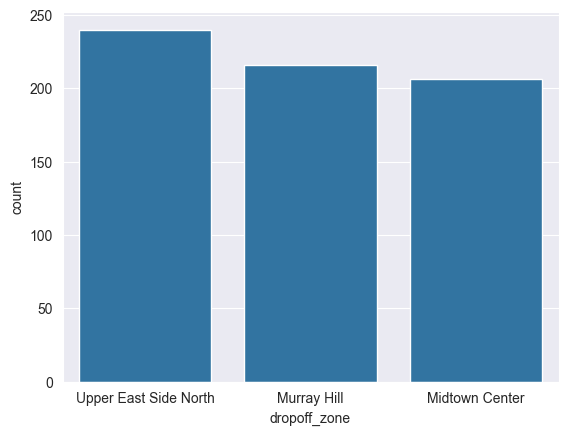

In [10]:
#4 Data Visualization
sns.countplot(data=tripData, x="dropoff_zone", order=tripData['dropoff_zone'].value_counts().iloc[:3].index)

<Axes: xlabel='pickup_zone', ylabel='count'>

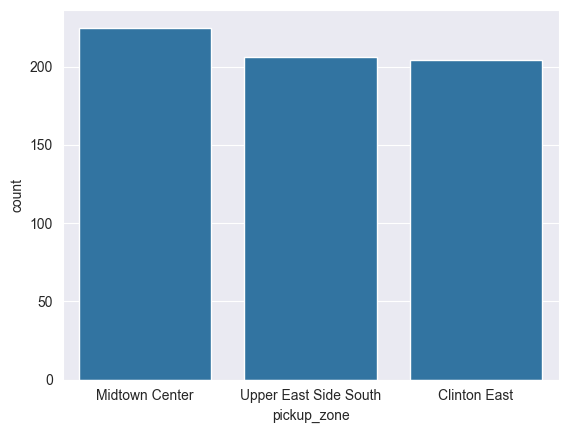

In [11]:
sns.countplot(data=tripData, x="pickup_zone", order=tripData['pickup_zone'].value_counts().iloc[:3].index)

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\2492151631.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  timeData['pickup'] = pd.to_datetime(timeData['pickup'].dt.strftime('%H:%M'))


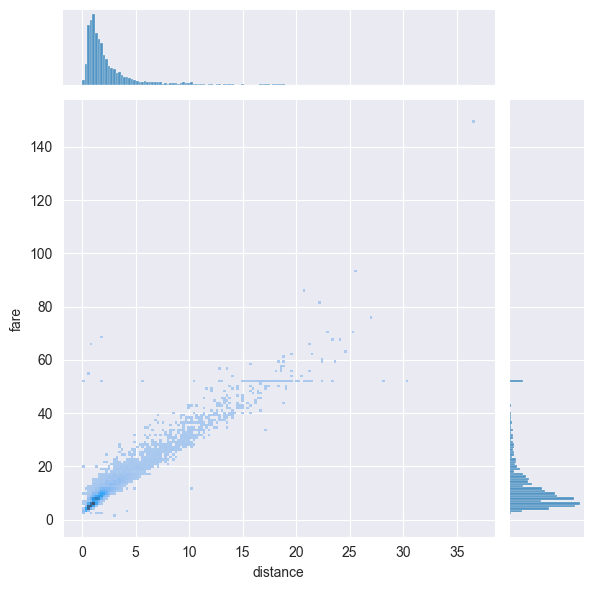

In [12]:
timeData = tripData
timeData['pickup'] = pd.to_datetime(timeData['pickup'].dt.strftime('%H:%M'))
sns.jointplot(data=timeData,x="distance", y="fare", kind="hist")

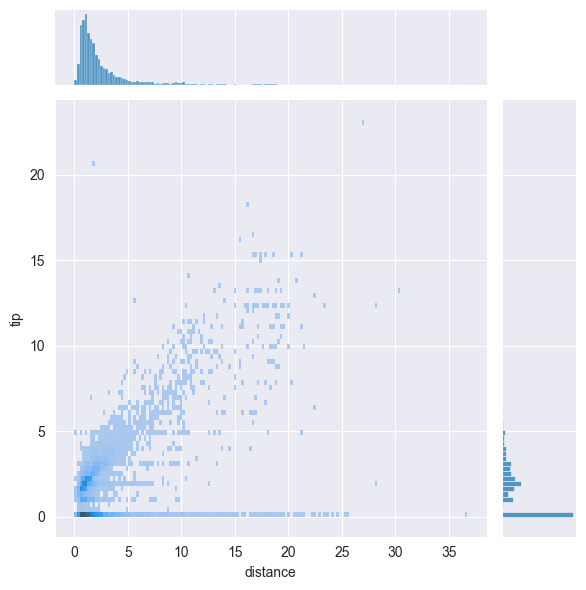

In [13]:
sns.jointplot(data=timeData,x="distance", y="tip", kind="hist")

## Task 2

In [14]:
#1 Feature Engineering - Binning

bins = [-1,0,3,8,100]

tripData["tip_bin"] = pd.cut(tripData["tip"],bins)

tripData.head(99999999999)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_bin
0,2024-02-25 20:21:00,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,"(0, 3]"
1,2024-02-25 16:11:00,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,"(-1, 0]"
2,2024-02-25 17:53:00,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,"(0, 3]"
3,2024-02-25 01:23:00,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,"(3, 8]"
4,2024-02-25 13:27:00,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,"(0, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2024-02-25 09:51:00,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,"(0, 3]"
6429,2024-02-25 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,"(-1, 0]"
6430,2024-02-25 22:55:00,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,"(-1, 0]"
6431,2024-02-25 10:09:00,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,"(-1, 0]"


In [15]:
print(tripData.groupby("tip_bin").size())

tip_bin
(-1, 0]     2235
(0, 3]      2710
(3, 8]      1114
(8, 100]     193
dtype: int64


C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\3743061854.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tripData.groupby("tip_bin").size())


In [16]:
#1 Feature Engineering - One hot encoding

one_hot = pd.get_dummies(tripData["dropoff_zone"])

one_hot.head(10)

,Allerton/Pelham Gardens,Alphabet City,Astoria,Auburndale,Baisley Park,Bath Beach,Battery Park,Battery Park City,Bay Ridge,Bayside,...,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodhaven,Woodlawn/Wakefield,Woodside,World Trade Center,Yorkville East,Yorkville West
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# 2. Descriptive Statistics

tripData.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6252,6252,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000,6252.000000
mean,2024-02-25 14:22:27.706334208,2019-03-16 08:37:05.918266368,1.566219,3.011766,12.875187,1.956750,0.309623,18.279819
min,2024-02-25 00:00:00,2019-02-28 23:32:35,1.000000,0.010000,1.000000,0.000000,0.000000,1.300000
25%,2024-02-25 10:03:00,2019-03-08 15:47:37.500000,1.000000,1.000000,6.500000,0.000000,0.000000,10.800000
50%,2024-02-25 15:00:30,2019-03-15 22:02:12.500000,1.000000,1.660000,9.500000,1.700000,0.000000,14.160000
75%,2024-02-25 19:18:00,2019-03-23 17:29:17,2.000000,3.220000,15.000000,2.760000,0.000000,20.300000
max,2024-02-25 23:59:00,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.201209,3.722938,10.656627,2.346348,1.358912,12.853383


In [18]:
# 2. Descriptive Statistics -Categories

print(tripData.groupby("payment").size())

print(tripData.groupby("color").size())

print(tripData.groupby("passengers").size())

payment
cash           1763
credit card    4489
dtype: int64
color
green      956
yellow    5296
dtype: int64
passengers
1    4607
2     867
3     240
4     110
5     277
6     151
dtype: int64


In [19]:
print(len(tripData["dropoff_zone"].unique()))

203


<Axes: xlabel='fare'>

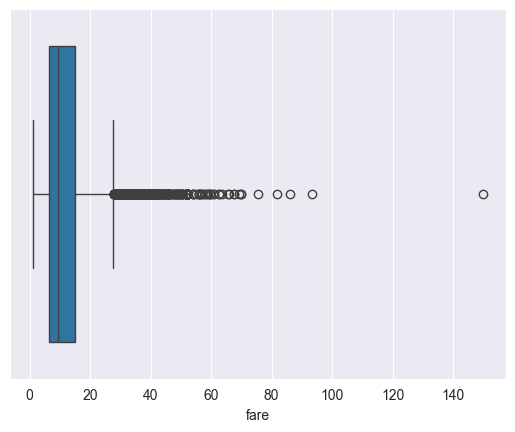

In [20]:
sns.boxplot(x=tripData["fare"])

<Axes: xlabel='distance'>

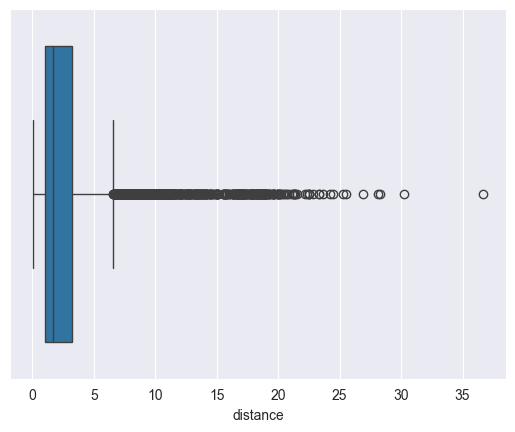

In [21]:
sns.boxplot(x=tripData["distance"])

<Axes: xlabel='tip'>

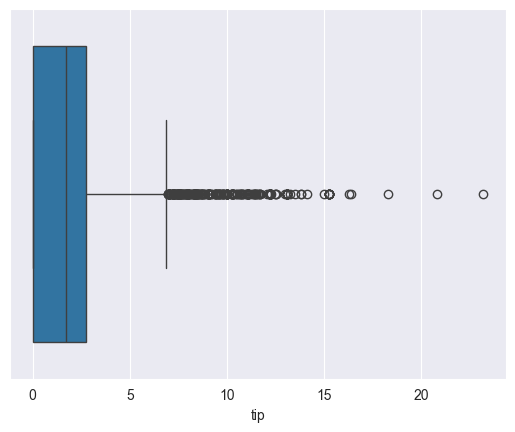

In [22]:
sns.boxplot(x=tripData["tip"])

In [51]:
# Remove the identified outlier by sorting by trip distance and remove the first element
taxiData = taxiData.sort_values('distance', ascending = False)
taxiData = taxiData.iloc[1:,:]

taxiData.head(1000)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
4219,2019-03-08 20:07:54,2019-03-08 21:10:00,1,36.66,96.5,10.00,5.76,113.56,yellow,credit card,JFK Airport,NaN,Queens,NaN
4050,2019-03-13 14:05:19,2019-03-13 15:01:16,6,33.76,143.5,0.00,0.00,144.30,yellow,cash,LaGuardia Airport,NaN,Queens,NaN
5648,2019-03-19 14:21:35,2019-03-19 15:51:28,2,33.46,150.0,0.00,18.90,169.70,green,cash,East Flushing,NaN,Queens,NaN
2397,2019-03-21 18:56:59,2019-03-21 19:49:58,1,30.23,52.0,13.11,5.76,78.67,yellow,credit card,JFK Airport,Meatpacking/West Village West,Queens,Manhattan
1535,2019-03-09 18:57:53,2019-03-09 19:49:53,1,28.30,52.0,2.00,5.76,63.06,yellow,credit card,World Trade Center,JFK Airport,Manhattan,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2019-03-09 11:05:05,2019-03-09 11:24:46,1,4.88,19.0,4.46,0.00,26.76,yellow,credit card,Union Sq,Financial District South,Manhattan,Manhattan
5865,2019-03-28 15:55:12,2019-03-28 16:46:59,1,4.88,31.5,0.00,0.00,32.30,green,credit card,Fort Greene,Brownsville,Brooklyn,Brooklyn
49,2019-03-04 21:35:00,2019-03-04 21:53:42,1,4.87,17.5,0.00,0.00,21.30,yellow,cash,West Village,Upper West Side South,Manhattan,Manhattan
5412,2019-03-20 19:06:33,2019-03-20 19:25:29,4,4.86,17.5,4.36,0.00,26.16,yellow,credit card,SoHo,Lincoln Square East,Manhattan,Manhattan


<Axes: xlabel='distance'>

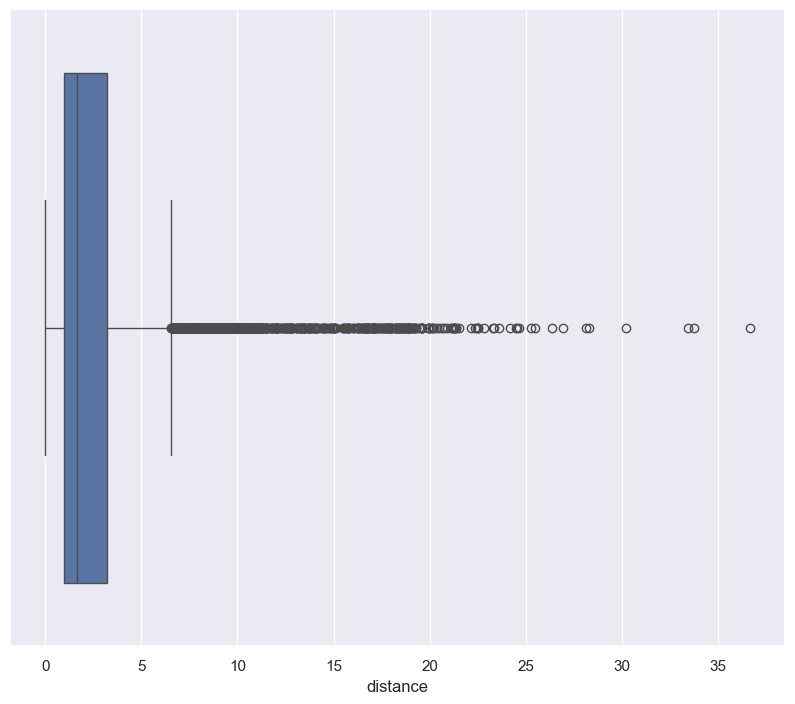

In [52]:
#Show box blop with no outliers
sns.boxplot(x=taxiData["distance"])

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\973195956.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)


[Text(0, 0, '(0, 3]'),
 Text(1, 0, '(-1, 0]'),
 Text(2, 0, '(3, 8]'),
 Text(3, 0, '(8, 100]')]

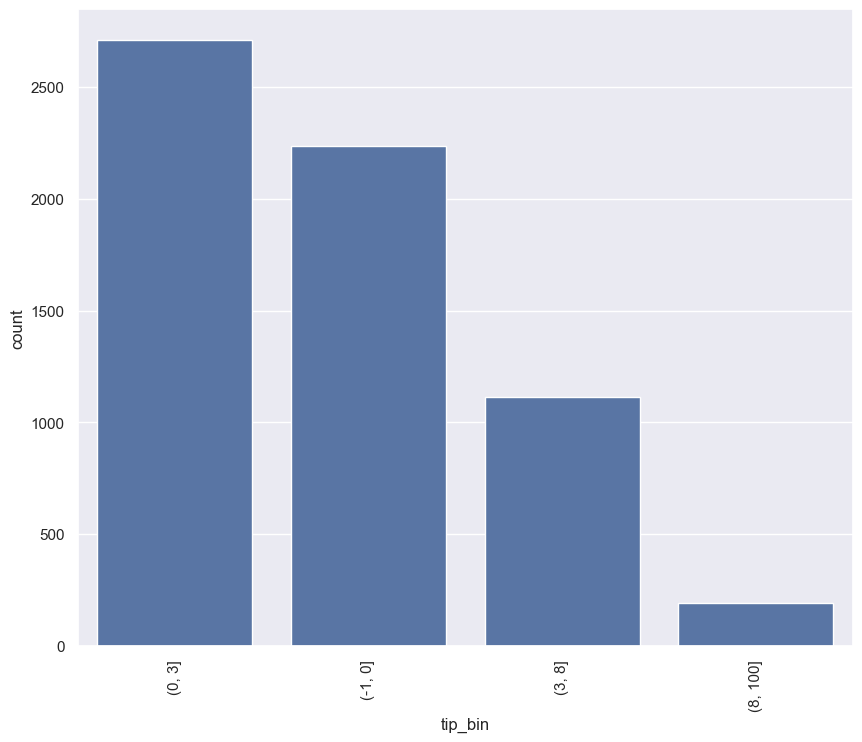

In [23]:

sns.set(rc={'figure.figsize':(10,8.27)})
myplot = sns.countplot(data=tripData, x="tip_bin", order=tripData['tip_bin'].value_counts().iloc[:203].index )
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\3862557515.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Queens'),
 Text(2, 0, 'Brooklyn'),
 Text(3, 0, 'Bronx'),
 Text(4, 0, 'Staten Island')]

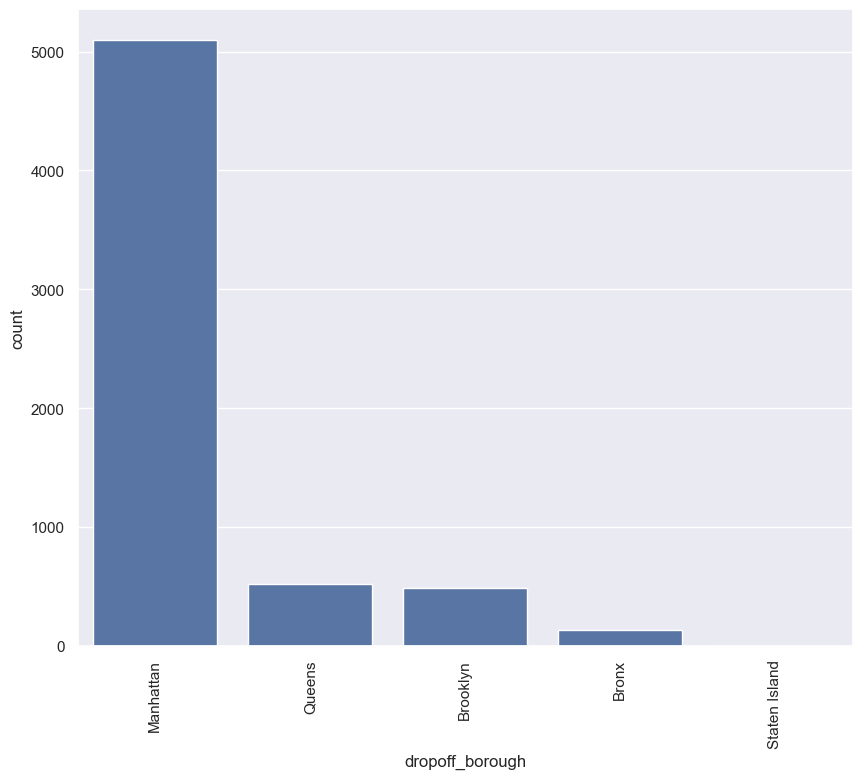

In [24]:
sns.set(rc={'figure.figsize':(10,8.27)})
myplot = sns.countplot(data=tripData, x="dropoff_borough", order=tripData['dropoff_borough'].value_counts().iloc[:203].index )
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

C:\Users\KRP\AppData\Local\Temp\ipykernel_24988\2381427274.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Queens'),
 Text(2, 0, 'Brooklyn'),
 Text(3, 0, 'Bronx')]

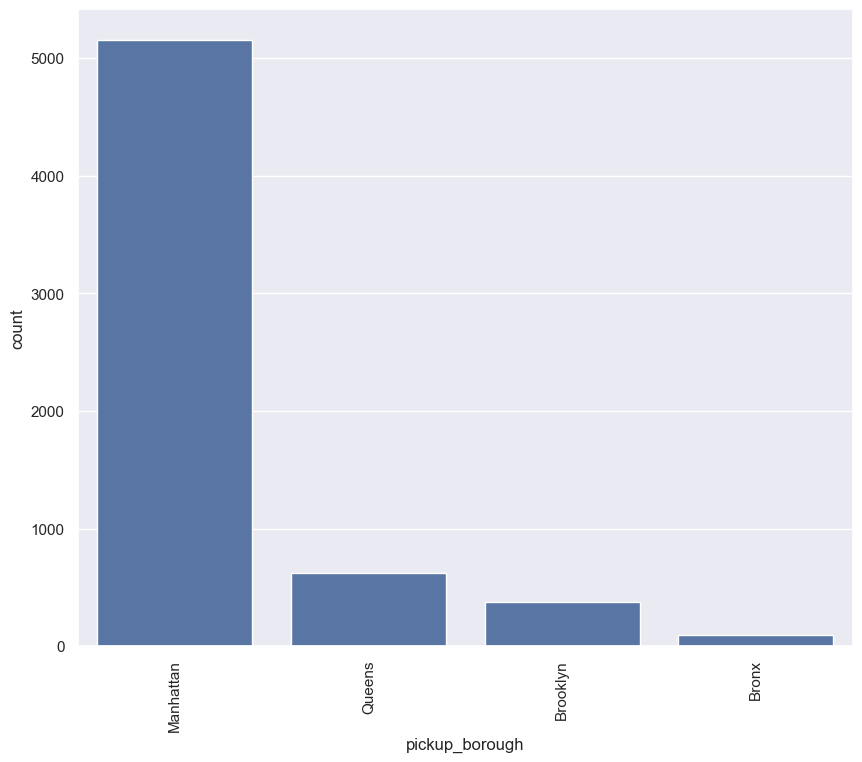

In [25]:
sns.set(rc={'figure.figsize':(10,8.27)})
myplot = sns.countplot(data=tripData, x="pickup_borough", order=tripData["pickup_borough"].value_counts().iloc[:203].index )
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

# Task 3